     Week        Team Win  pointYTD  ydsYTD  pYdsYTD  dYdsYTD  dRYdsYTD  \
0       2  Buccaneers   W        31     431      379      451        60   
1       2   Cardinals   W        38     416      280      248        86   
2       2      Chiefs   L        33     397      324      457       153   
3       2      Ravens   W        27     406      217      491        82   
4       2        Rams   W        34     386      312      322       134   
..    ...         ...  ..       ...     ...      ...      ...       ...   
503    18        Jets   L       283    4789     3240     5847      2042   
504    18       Colts   L       258    4900     3230     5318      2050   
505    18      Texans   L       255    4374     3016     6130      2294   
506    18      Giants   L       251    4707     3113     5707      1967   
507    18     Jaguars   W       227    4873     3219     5769      2033   

     dPYdsYTD  Rank  
0         391     1  
1         162     2  
2         304     3  
3         4

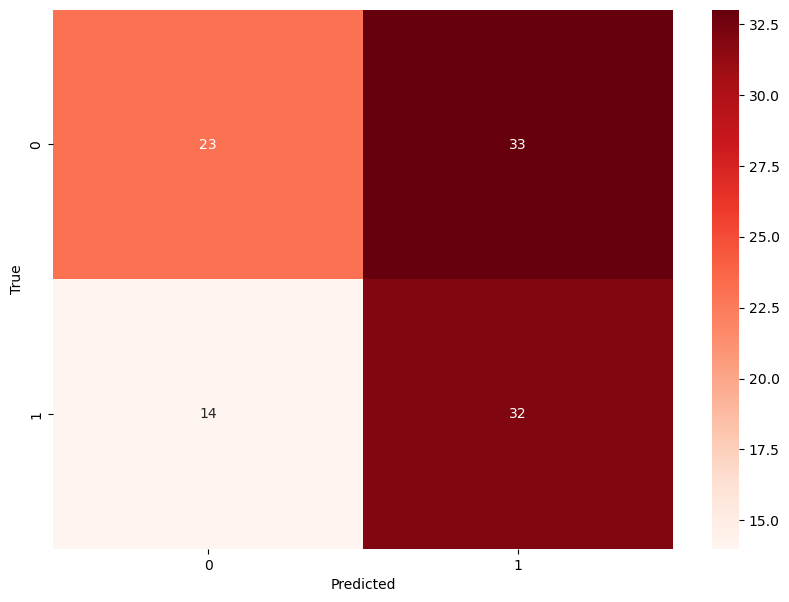

[[23 33]
 [14 32]]
['W']


In [107]:
#Exploring sports prediction
#gathered the data from https://www.pro-football-reference.com/

import pandas as pd
import numpy as np
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


data = pd.read_csv('games2021.csv')
data = data[data.Week != 1]
print (data)
FEATURE_NAMES = [['pointYTD','ydsYTD','dRYdsYTD']]

x = data[['Week','pointYTD','ydsYTD','dRYdsYTD','dPYdsYTD','Rank']].values
y = data['Win'].values

# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Creating Decision Tree classifier object
clf = RandomForestClassifier(n_estimators=1000, max_depth=4)

# Training Decision Tree classifier
clf = clf.fit(X_train, y_train)

# Predicting the response for test dataset
y_pred = clf.predict(X_test)

# Importing metrics for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

#TP TN
#FP FN
# create a seaborn heatmap for visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

print (clf.predict([[2, 71, 881,308, 308,15 ]]))

